In [6]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np

In [7]:
def selectLabel(ip_image, ip_label):
    op_image, op_label = [], []
    for i, label in enumerate(ip_label):
        if label in [3, 5]:
            op_image.append(ip_image[i])
            op_label.append(label)
    return np.array(op_image), np.array(op_label)

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = selectLabel(x_train, y_train)
x_test, y_test = selectLabel(x_test, y_test)
print('train:', len(x_train))
print('test:', len(x_test))

train: 11552
test: 1902


In [9]:
x_train4D = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test4D = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

x_train4D_normalize = x_train4D / 255
x_test4D_normalize = x_test4D / 255

y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [65]:
model = Sequential(name='CNN')

model.add(Conv2D(filters=16,
                 kernel_size=(3, 3),
                 padding='same',
                 input_shape=(28, 28, 1),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=42,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax')) # only 3 and 5, so it's [0 0 0 1 0 1]
print(model.summary())

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 42)        6090      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 7, 7, 42)          0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 7, 7, 42)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 2058)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               263552  

In [66]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [67]:
train_history = model.fit(x=x_train4D_normalize,
                          y=y_train_onehot,
                          validation_split=0.2,
                          epochs=10,
                          batch_size=300,
                          verbose=2)

Train on 9241 samples, validate on 2311 samples
Epoch 1/10
 - 2s - loss: 0.5404 - accuracy: 0.7848 - val_loss: 0.1493 - val_accuracy: 0.9485
Epoch 2/10
 - 2s - loss: 0.1329 - accuracy: 0.9517 - val_loss: 0.0735 - val_accuracy: 0.9723
Epoch 3/10
 - 2s - loss: 0.0681 - accuracy: 0.9753 - val_loss: 0.0485 - val_accuracy: 0.9801
Epoch 4/10
 - 2s - loss: 0.0445 - accuracy: 0.9859 - val_loss: 0.0354 - val_accuracy: 0.9866
Epoch 5/10
 - 2s - loss: 0.0301 - accuracy: 0.9897 - val_loss: 0.0315 - val_accuracy: 0.9883
Epoch 6/10
 - 2s - loss: 0.0250 - accuracy: 0.9926 - val_loss: 0.0292 - val_accuracy: 0.9887
Epoch 7/10
 - 2s - loss: 0.0216 - accuracy: 0.9927 - val_loss: 0.0293 - val_accuracy: 0.9900
Epoch 8/10
 - 2s - loss: 0.0191 - accuracy: 0.9944 - val_loss: 0.0222 - val_accuracy: 0.9922
Epoch 9/10
 - 2s - loss: 0.0174 - accuracy: 0.9952 - val_loss: 0.0227 - val_accuracy: 0.9922
Epoch 10/10
 - 2s - loss: 0.0151 - accuracy: 0.9961 - val_loss: 0.0190 - val_accuracy: 0.9922


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
def show_train_history(tr_history, train, valid):
    plt.plot(tr_history.history[train])
    plt.plot(tr_history.history[valid])
    plt.title('Train History')
    plt.xlabel('epoch'); plt.ylabel(train)
    plt.legend(['train', 'validation'], loc='upper left')

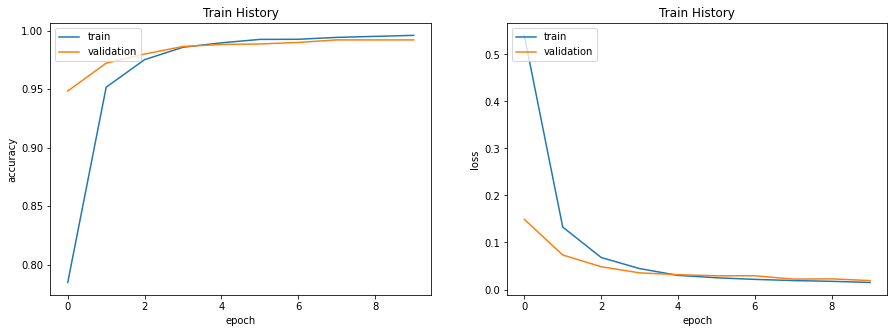

In [68]:
plt.figure(figsize=(15,5))
plt.subplot(121); show_train_history(train_history, 'accuracy', 'val_accuracy')
plt.subplot(122); show_train_history(train_history, 'loss', 'val_loss')
plt.show()

In [69]:
scores = model.evaluate(x_test4D_normalize, y_test_onehot)
print('lose =', scores[0])
print('accuracy =', scores[1])

1902/1902 [==============================] - 0s 62us/step
lose = 0.010963381554715464
accuracy = 0.9973711967468262


In [70]:
prediction = model.predict_classes(x_test4D_normalize)
pd.crosstab(y_test, prediction, rownames=['label'], colnames=['predict'])

predict,3,5
label,,
3,1008,2
5,3,889


In [71]:
model.save('model/mdl_20220328.h5')